In [4]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import sklearn.feature_extraction.text as pre
from sklearn import preprocessing
import pickle as pk

In [5]:
data=pd.read_csv("spamPretraité.csv")
Y = data["label"].to_numpy() 
Y[Y == "ham"]=0
Y[Y == "spam"]=1
Y = Y.astype('int')

In [6]:
X=pd.read_csv("countMatrix")
X= X.to_numpy()

In [7]:
 

 
X_train = X[0:3300]
X_test = X[3300:4197]
Y_train = Y[0:3300]
Y_test = Y[3300:4197]
from sklearn.preprocessing import MinMaxScaler
# Normalize data

X_train = np.asarray(X_train).astype('float32')

# print(X_train)

# print(Y_train.shape)
# print(Y_test.shape)

**Naive Bayes Have three Classifier(Bernouli,Multinominal,Gaussian)
Here I use Multinominal Bayes Because here data in a discrete form 
discrete data(e.g movie ratings ranging  1 to 5 as each rating will have certain frequency to represent)**

In [8]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [9]:
# train the model multiple times
num_iterations = 5
for i in range(num_iterations):
    # fit the model on a random subset of the training data
    model.fit(X_train ,Y_train)
    # evaluate the model on the testing data
    accuracy = model.score(X_test, Y_test)
    print(f'Iteration {i+1}: accuracy = {accuracy:.3f}')

Iteration 1: accuracy = 0.978
Iteration 2: accuracy = 0.971
Iteration 3: accuracy = 0.974
Iteration 4: accuracy = 0.975
Iteration 5: accuracy = 0.977


In [10]:
model.score(X_test ,Y_test)


0.9765886287625418

In [11]:
from sklearn.metrics import classification_report

# Make predictions on test set
y_pred = model.predict(X_test)

# Convert predictions to binary values
y_pred = (y_pred > 0.5)

# Calculate precision, recall, and F1 score
report = classification_report(Y_test, y_pred)

print(report)


In [12]:
from sklearn.metrics import classification_report

# Make predictions on test set
y_pred = model.predict(X_test)

# Convert predictions to binary values
y_pred = (y_pred > 0.5)

# Calculate precision, recall, and F1 score
report = classification_report(Y_test, y_pred)

print(report)


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       600
           1       0.97      0.96      0.96       297

    accuracy                           0.98       897
   macro avg       0.97      0.97      0.97       897
weighted avg       0.98      0.98      0.98       897



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, cohen_kappa_score

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)

# Calculate confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Calculate AUC-ROC score
auc_roc = roc_auc_score(Y_test, y_pred)

# Calculate Cohen's kappa
kappa = cohen_kappa_score(Y_test, y_pred)

print(f"accuracy_score = {accuracy} ")
print(f"confusion matrix : {cm}")
print(f"roc auc score : {auc_roc}")
print(f"cohen kappa score : {kappa}")

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Calculate precision, recall, and F1 score
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Confusion Matrix :

In [13]:
from sklearn.metrics import confusion_matrix

# Assuming you have already trained and predicted with your model
cm = confusion_matrix(Y_test, y_pred)
print(cm)


[[591   9]
 [ 12 285]]


ROC Curve

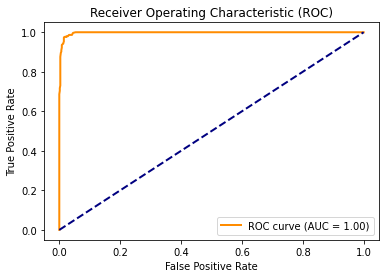

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have already trained and predicted with your model
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Precision-Recall Curve :


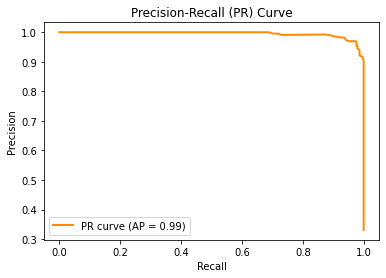

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming you have already trained and predicted with your model
y_pred_prob = model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(Y_test, y_pred_prob)
avg_precision = average_precision_score(Y_test, y_pred_prob)

# Plot PR curve
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (AP = %0.2f)' % avg_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc="lower left")
plt.show()


Word Cloud: You can create a word cloud to visualize the most common words in your spam and non-spam emails. This can help you understand the characteristics of spam emails and non-spam emails and potentially help you improve your feature engineering

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

data=pd.read_csv("spamPretraité.csv")
 

 
data = data.drop(columns=data.columns[data.columns.str.contains('Unnamed')])
data['Spam']=data['label'].apply(lambda x:1 if x=='spam' else 0)
data = data.drop(columns=data.columns[data.columns.str.contains('label')])
# data= data.rename(columns={'email' : 'email2'})
# drop the "emails" column

# rename preprocessed_email to email 
data= data.rename(columns={'preprocessed_email' : 'email'})
# Replace NaN values in 'email' column with values from 'email2' column
# data['email'] = np.where(pd.isnull(data['email']), data['email2'], data['email'])
# data = data.drop("email2", axis=1)

# data =data.fillna("")
# replace any NaN values in the 'email' column with an empty string
data['email'] = data['email'].fillna('')


# use the str.contains() method to find emails that contain 'Nan'
mask = data['email'].str.contains('Nan')

# filter out the emails that contain 'Nan'
data = data[~mask]
data


,index,email,Spam
0,213,hi i have creat two databas dbnombr and dbnom...,0
1,2514,thi articl from nytimescom ha been sent to yo...,0
2,289,greet bless to you offer for your sensit deli...,1
3,3660,url httpaddr date thu nombr nombr sep nombr n...,0
4,3579,url httpaddr date nombr nombr nombr nombr nom...,0
...,...,...,...
4192,2288,first it wa my understand that they had the f...,0
4193,2790,lanc wrote make sure you rebuild as root and ...,0
4194,3323,on mon sep nombr nombr nombr nombr nombr nomb...,0
4195,390,doctyp html public w nombr cdtd html nombr no...,1


In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have loaded your data into a pandas DataFrame named 'data'
# and the 'Spam' column contains the label (0 for ham, 1 for spam) and 'email' column contains the email text data

# Separate ham and spam emails
ham_emails = data[data['Spam'] == 0]
spam_emails = data[data['Spam'] == 1]
# # Create a WordCloud object for ham emails
ham_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(ham_emails['email']))

# # Create a WordCloud object for spam emails
spam_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(spam_emails['email']))




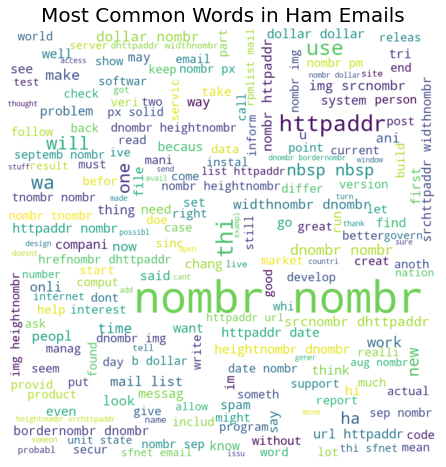

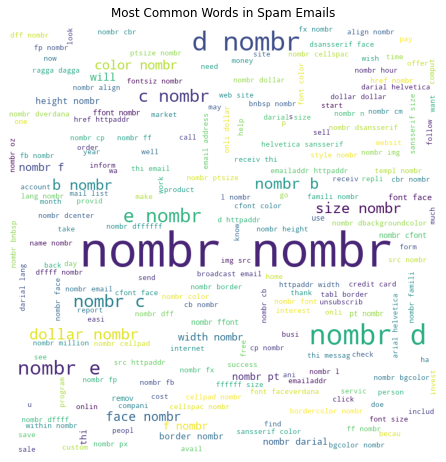

In [18]:
# Display the ham word cloud
plt.figure(figsize=(6, 6), facecolor=None)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Most Common Words in Ham Emails', fontsize=20)
plt.show()

# # Display the spam word cloud
plt.figure(figsize=(6, 6), facecolor=None)
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Most Common Words in Spam Emails')
plt.show()

In [20]:

import joblib
# Save the model as .h5 file
joblib.dump(model, 'Random_Forest.joblib')

['Random_Forest.joblib']